In [569]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [570]:
# from google.colab import drive
# drive.mount('/content/drive')


In [571]:
Verizon_data = 'Telco_Churn_Data.csv'

df = pd.read_csv(Verizon_data)

df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


In [572]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [573]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [574]:
df_summ_all = df.describe(include = 'all')
df_summ_all

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7042,7040,7042,7041,...,7041,7041,7040,7043,7041,7042,7041,7042.000000,7042,7042
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,4,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6360,3388,3095,3498,...,3094,3472,2808,2785,3870,4170,2364,NaN,11,5173
mean,NaN,NaN,0.162147,NaN,NaN,32.683516,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756774,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,28.998589,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.089352,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Since most of the dtypes are objects we will need to do some work before we can compute the basic statistics.

In [575]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7042.000000
mean,0.162147,32.683516,64.756774
std,0.368612,28.998589,30.089352
min,0.000000,-50.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,1000.000000,118.750000


In [576]:
df.isnull().values.any()

True

In [577]:
df.isnull().head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [578]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       3
InternetService     1
OnlineSecurity      2
OnlineBackup        0
DeviceProtection    2
TechSupport         2
StreamingTV         3
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       2
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [579]:
df1 = df.drop(df.index[[1411, 1375, 3995, 4670, 6239, 4666, 1401, 1417, 4668, 1397]])

In [580]:
nan_count = np.sum(df1.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [581]:
df1.shape

(7033, 21)

In [582]:
# If we one hot encode the entire dataframe then we get over 10000 columns
pd.get_dummies(df1).shape

(7033, 13601)

In [583]:
# Instead we need to pick and choose which columns are best to one hot encode and which aren't

In [584]:
# Male 1 and Female 0
df1['gender'] = df1['gender'].replace({'Male': 1, 'Female': 0})
df1 = df1.rename(columns={'gender': 'isMale'})
df1

,customerID,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,0,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,0,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,1,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [585]:
# Yes 1 and No 0 
df1['Partner'] = df1['Partner'].replace({'Yes': 1, 'No': 0})
df1['Dependents'] = df1['Dependents'].replace({'Yes': 1, 'No': 0})
df1['PhoneService'] = df1['PhoneService'].replace({'Yes': 1, 'No': 0})

In [586]:
# Convert column to either yes or no
df1['MultipleLines'] = df1['MultipleLines'].replace({'No phone service': 'No'})
df1['OnlineSecurity'] = df1['OnlineSecurity'].replace({'No internet service': 'No'})
df1['OnlineBackup'] = df1['OnlineBackup'].replace({'No internet service': 'No'})
df1['DeviceProtection'] = df1['DeviceProtection'].replace({'No internet service': 'No'})
df1['TechSupport'] = df1['TechSupport'].replace({'No internet service': 'No'})
df1['StreamingTV'] = df1['StreamingTV'].replace({'No internet service': 'No'})
df1['StreamingMovies'] = df1['StreamingMovies'].replace({'No internet service': 'No'})
df1['InternetService'] = df1['InternetService'].replace({'DSL': 'Yes', 'Fiber optic' : 'Yes'})
df1['PaymentMethod'] = df1['PaymentMethod'].replace({'Bank transfer (automatic)': 'Yes', 'Credit card (automatic)' : 'Yes', 'Electronic check' : 'No', 'Mailed check' : 'No'})

df1

,customerID,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,Yes,Yes,...,Yes,No,No,No,One year,No,No,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Yes,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,No,84.80,1990.5,No
7039,2234-XADUH,0,0,1,1,72,1,Yes,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Yes,103.20,7362.9,No
7040,4801-JZAZL,0,0,1,1,11,0,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,29.60,346.45,No
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,74.40,306.6,Yes


In [587]:
df1['MultipleLines'] = df1['MultipleLines'].replace({'Yes': 1, 'No': 0})
df1['OnlineSecurity'] = df1['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
df1['OnlineBackup'] = df1['OnlineBackup'].replace({'Yes': 1, 'No': 0})
df1['DeviceProtection'] = df1['DeviceProtection'].replace({'Yes': 1, 'No': 0})
df1['TechSupport'] = df1['TechSupport'].replace({'Yes': 1, 'No': 0})
df1['StreamingTV'] = df1['StreamingTV'].replace({'Yes': 1, 'No': 0})
df1['StreamingMovies'] = df1['StreamingMovies'].replace({'Yes': 1, 'No': 0})
df1['InternetService'] = df1['InternetService'].replace({'Yes': 1, 'No': 0})
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df1['PaymentMethod'] = df1['PaymentMethod'].replace({'Yes': 1, 'No': 0})
df1['Churn'] = df1['Churn'].replace({'Yes': 1, 'No': 0})

df1

,customerID,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,1,0,74.40,306.6,1


In [588]:
df1.dtypes

customerID           object
isMale                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [589]:
unique_values = df1['Contract'].unique()
value_counts = df1['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year' '1'] Contract
Month-to-month    3864
Two year          1693
One year          1472
1                    4
Name: count, dtype: int64


In [590]:
df1_encoded = pd.get_dummies(df1, columns=['Contract'])
df1_encoded.shape

(7033, 24)

In [591]:
df1_encoded

,customerID,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_1,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,1,0,29.85,29.85,0,False,True,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,0,0,56.95,1889.5,0,False,False,True,False
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,1,0,53.85,108.15,1,False,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,0,0,1,42.30,1840.75,0,False,False,True,False
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,1,0,70.70,151.65,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,0,84.80,1990.5,0,False,False,True,False
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,1,1,103.20,7362.9,0,False,False,True,False
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,1,0,29.60,346.45,0,False,True,False,False
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,1,0,74.40,306.6,1,False,True,False,False


In [592]:
df2 = df1_encoded.drop(columns=['customerID', 'Contract_1'])
df2.shape

(7033, 22)

In [593]:
df2.dtypes

isMale                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
PaymentMethod                int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
dtype: object

In [594]:
unique_values = df1['MonthlyCharges'].unique()
value_counts = df1['MonthlyCharges'].value_counts()

print(unique_values, value_counts)

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.70     43
          ..
23.65      1
114.70     1
87.80      1
43.65      1
78.70      1
Name: count, Length: 1585, dtype: int64


In [595]:
# Statistics on Monthly Charges
maximum_MC = df2['MonthlyCharges'].max()
minimum_MC = df2['MonthlyCharges'].min()
data_range_MC = maximum_MC - minimum_MC
average_MC = df2['MonthlyCharges'].mean()
std_deviation_MC = df2['MonthlyCharges'].std()
print(f"Maximum: {maximum_MC}")
print(f"Minimum: {minimum_MC}")
print(f"Range: {data_range_MC}")
print(f"Average: {average_MC}")
print(f"Standard Deviation: {std_deviation_MC}")

Maximum: 118.75
Minimum: 18.25
Range: 100.5
Average: 64.76227072373098
Standard Deviation: 30.089196044052716


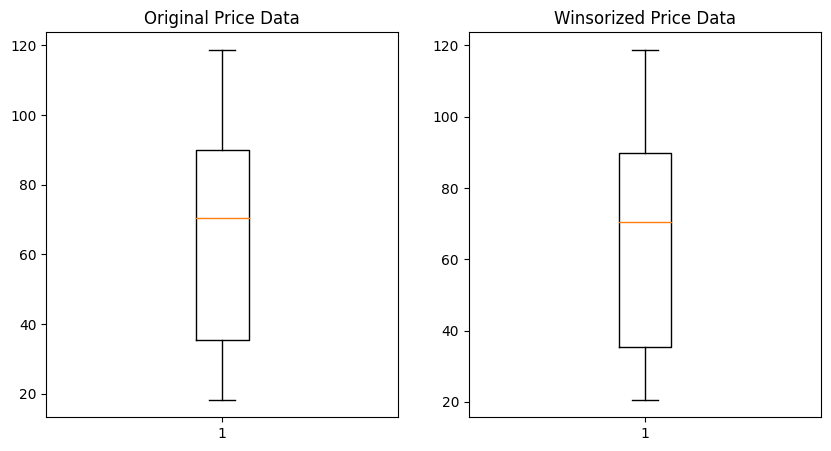

Original Price Data Summary Statistics:
 count    7033.000000
mean       64.762271
std        30.089196
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Winsorized Price Data Summary Statistics:
 count    7033.000000
mean       64.874662
std        29.921695
min        20.600000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: winsorized_MonthlyCharges, dtype: float64


In [596]:
lower_percentile = 15
upper_percentile = 100

# Calculating the threshold values
lower_threshold = np.percentile(df2['MonthlyCharges'], lower_percentile)
upper_threshold = np.percentile(df2['MonthlyCharges'], upper_percentile)

# Winsorizing the data
df2['winsorized_MonthlyCharges'] = np.clip(df2['MonthlyCharges'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_MC = df2['MonthlyCharges'].describe()
winsorized_stats_MC = df2['winsorized_MonthlyCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df2['MonthlyCharges'])
plt.title('Original Price Data')
plt.subplot(1, 2, 2)
plt.boxplot(df2['winsorized_MonthlyCharges'])
plt.title('Winsorized Price Data')
plt.show()

print("Original Price Data Summary Statistics:\n", original_stats_MC)
print("\nWinsorized Price Data Summary Statistics:\n", winsorized_stats_MC)

In [597]:
# Statistics on Total Charges
maximum_TC = df2['TotalCharges'].max()
minimum_TC = df2['TotalCharges'].min()
# data_range_TC = maximum_TC - minimum_TC
# average_TC = df2['TotalCharges'].mean()
# std_deviation_TC = df2['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
#print(f"Range: {data_range_TC}")
#print(f"Average: {average_TC}")
#print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 999.9
Minimum:  


In [598]:
unique_values = df2['TotalCharges'].unique().__array__
value_counts = df2['TotalCharges'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x13e9d2df0> TotalCharges
20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
2117.2     1
203.95     1
6849.4     1
692.35     1
6844.5     1
Name: count, Length: 6521, dtype: int64


In [599]:
df2['Charges Match'] = df2['MonthlyCharges'] == df2['TotalCharges']

In [600]:
unique_values = df2['Charges Match'].unique().__array__
value_counts = df2['Charges Match'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x13fa7efd0> Charges Match
False    7033
Name: count, dtype: int64


In [601]:
summary_stats = df2[['MonthlyCharges', 'TotalCharges']].describe()
summary_stats

,MonthlyCharges
count,7033.000000
mean,64.762271
std,30.089196
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [602]:
df2['TotalCharges'].isna().sum()
min_price = df2['TotalCharges'].min()
min_price

' '

In [603]:
min_price = df2['TotalCharges'].min()
min_price

' '

In [604]:
blank_rows = df2[df2['TotalCharges'].isna() | df2['TotalCharges'].eq('')]
blank_rows

,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,winsorized_MonthlyCharges,Charges Match


In [605]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')
df2.dropna(subset=['TotalCharges'], inplace=True)
df2['TotalCharges'].describe()


count    7022.000000
mean     2284.121981
std      2266.972770
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [606]:
# Statistics on Total Charges
maximum_TC = df2['TotalCharges'].max()
minimum_TC = df2['TotalCharges'].min()
data_range_TC = maximum_TC - minimum_TC
average_TC = df2['TotalCharges'].mean()
std_deviation_TC = df2['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
print(f"Range: {data_range_TC}")
print(f"Average: {average_TC}")
print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 8684.8
Minimum: 18.8
Range: 8666.0
Average: 2284.1219809171175
Standard Deviation: 2266.972769888514


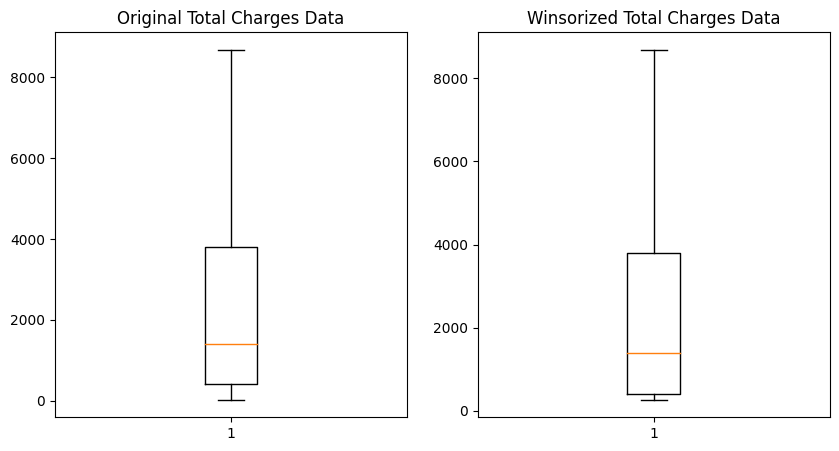

Original Price Data Summary Statistics:
 count    7022.000000
mean     2284.121981
std      2266.972770
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: TotalCharges, dtype: float64

Winsorized Price Data Summary Statistics:
 count    7022.000000
mean     2315.795671
std      2237.026446
min       266.960000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: winsorized_TotalCharges, dtype: float64


In [607]:
lower_percentile = 20
upper_percentile = 100

# Calculating the threshold values
lower_threshold = np.percentile(df2['TotalCharges'], lower_percentile)
upper_threshold = np.percentile(df2['TotalCharges'], upper_percentile)

# Winsorizing the data
df2['winsorized_TotalCharges'] = np.clip(df2['TotalCharges'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_TC = df2['TotalCharges'].describe()
winsorized_stats_TC = df2['winsorized_TotalCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df2['TotalCharges'])
plt.title('Original Total Charges Data')
plt.subplot(1, 2, 2)
plt.boxplot(df2['winsorized_TotalCharges'])
plt.title('Winsorized Total Charges Data')
plt.show()

print("Original Price Data Summary Statistics:\n", original_stats_TC)
print("\nWinsorized Price Data Summary Statistics:\n", winsorized_stats_TC)

In [608]:
df2['winsorized_TotalChargesInt'] = np.floor(df2['winsorized_TotalCharges']).astype(int)
df2['winsorized_MonthlyChargesInt'] = np.floor(df2['winsorized_MonthlyCharges']).astype(int)
df2

,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,winsorized_MonthlyCharges,Charges Match,winsorized_TotalCharges,winsorized_TotalChargesInt,winsorized_MonthlyChargesInt
0,0,0,1,0,1,0,0,1,0,1,...,29.85,0,True,False,False,29.85,False,266.96,266,29
1,1,0,0,0,34,1,0,1,1,0,...,1889.50,0,False,True,False,56.95,False,1889.50,1889,56
2,1,0,0,0,2,1,0,1,1,1,...,108.15,1,True,False,False,53.85,False,266.96,266,53
3,1,0,0,0,45,0,0,1,1,0,...,1840.75,0,False,True,False,42.30,False,1840.75,1840,42
4,0,0,0,0,2,1,0,1,0,0,...,151.65,1,True,False,False,70.70,False,266.96,266,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1990.50,0,False,True,False,84.80,False,1990.50,1990,84
7039,0,0,1,1,72,1,1,1,0,1,...,7362.90,0,False,True,False,103.20,False,7362.90,7362,103
7040,0,0,1,1,11,0,0,1,1,0,...,346.45,0,True,False,False,29.60,False,346.45,346,29
7041,1,1,1,0,4,1,1,1,0,0,...,306.60,1,True,False,False,74.40,False,306.60,306,74


In [609]:
# Tenure 
unique_values = df2['tenure'].unique()
value_counts = df2['tenure'].value_counts()

print(unique_values, value_counts)

[   1   34    2   45    8   22   10   28   62   13   16   58   49   25
   69   52   71   21   12   30   47   72   17   27    5   46   11   70
   63   43   15   60   18   66    9    3   31   50   64   56    7   42
   35   48   29   65   38   68   32   55   37   36   41    6    4   33
   67   23   57   61   14   20   53   40   59   24   44   19   54   51
   26   39 1000  300  -50  500  700] tenure
 1       613
 72      361
 2       237
 3       200
 4       174
        ... 
 1000      1
 300       1
-50        1
 500       1
 700       1
Name: count, Length: 77, dtype: int64


In [610]:
comp_columns = df2[['tenure', 'Contract_Month-to-month']]
comp_columns

,tenure,Contract_Month-to-month
0,1,True
1,34,False
2,2,True
3,45,False
4,2,True
...,...,...
7038,24,False
7039,72,False
7040,11,True
7041,4,True


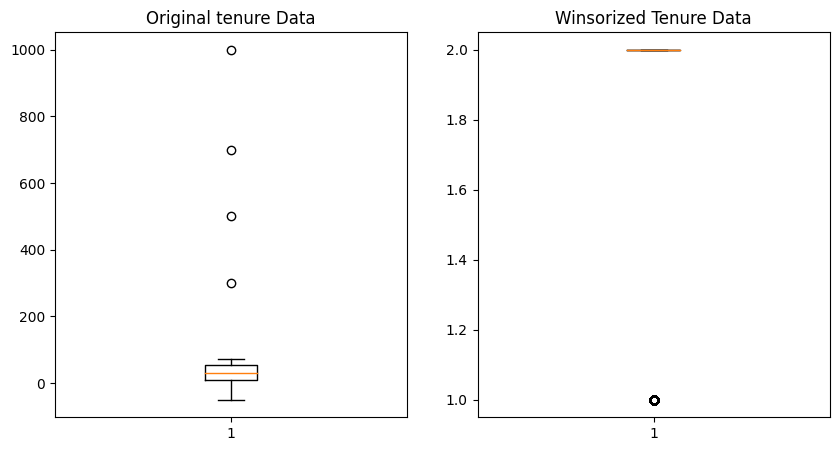

Original tenure Data Summary Statistics:
 count    7022.000000
mean       32.743236
std        29.001594
min       -50.000000
25%         9.000000
50%        29.000000
75%        55.000000
max      1000.000000
Name: tenure, dtype: float64

Winsorized tenure Data Summary Statistics:
 count    7022.000000
mean        1.912561
std         0.282498
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: winsorized_Tenure, dtype: float64


In [611]:
# Winsorizating tenure
lower_percentile = 1
upper_percentile = 10

# Calculating the threshold values
lower_threshold = np.percentile(df2['tenure'], lower_percentile)
upper_threshold = np.percentile(df2['tenure'], upper_percentile)

# Winsorizing the data
df2['winsorized_Tenure'] = np.clip(df2['tenure'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_tenure = df2['tenure'].describe()
winsorized_stats_tenure = df2['winsorized_Tenure'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df2['tenure'])
plt.title('Original tenure Data')
plt.subplot(1, 2, 2)
plt.boxplot(df2['winsorized_Tenure'])
plt.title('Winsorized Tenure Data')
plt.show()

print("Original tenure Data Summary Statistics:\n", original_stats_tenure)
print("\nWinsorized tenure Data Summary Statistics:\n", winsorized_stats_tenure)

In [612]:
df2['winsorized_Tenure']

0       1
1       2
2       2
3       2
4       2
       ..
7038    2
7039    2
7040    2
7041    2
7042    2
Name: winsorized_Tenure, Length: 7022, dtype: int64

In [613]:
# Tenure 
unique_values = df2['winsorized_Tenure'].unique()
value_counts = df2['winsorized_Tenure'].value_counts()

print(unique_values, value_counts)

[1 2] winsorized_Tenure
2    6408
1     614
Name: count, dtype: int64


In [614]:
df2.columns

Index(['isMale', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'winsorized_MonthlyCharges',
       'Charges Match', 'winsorized_TotalCharges',
       'winsorized_TotalChargesInt', 'winsorized_MonthlyChargesInt',
       'winsorized_Tenure'],
      dtype='object')

In [615]:
df2['ContractMonthtoMonthInt'] = np.floor(df2['Contract_Month-to-month']).astype(int)
df2['ContractOneYearInt'] = np.floor(df2['Contract_One year']).astype(int)
df2['ContractTwoYearInt'] = np.floor(df2['Contract_Two year']).astype(int)
df2

,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract_Two year,winsorized_MonthlyCharges,Charges Match,winsorized_TotalCharges,winsorized_TotalChargesInt,winsorized_MonthlyChargesInt,winsorized_Tenure,ContractMonthtoMonthInt,ContractOneYearInt,ContractTwoYearInt
0,0,0,1,0,1,0,0,1,0,1,...,False,29.85,False,266.96,266,29,1,1,0,0
1,1,0,0,0,34,1,0,1,1,0,...,False,56.95,False,1889.50,1889,56,2,0,1,0
2,1,0,0,0,2,1,0,1,1,1,...,False,53.85,False,266.96,266,53,2,1,0,0
3,1,0,0,0,45,0,0,1,1,0,...,False,42.30,False,1840.75,1840,42,2,0,1,0
4,0,0,0,0,2,1,0,1,0,0,...,False,70.70,False,266.96,266,70,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,False,84.80,False,1990.50,1990,84,2,0,1,0
7039,0,0,1,1,72,1,1,1,0,1,...,False,103.20,False,7362.90,7362,103,2,0,1,0
7040,0,0,1,1,11,0,0,1,1,0,...,False,29.60,False,346.45,346,29,2,1,0,0
7041,1,1,1,0,4,1,1,1,0,0,...,False,74.40,False,306.60,306,74,2,1,0,0


In [616]:
new_order_DM = ['isMale', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt',
       'winsorized_Tenure', 'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn']
df_reordered = df2[new_order_DM]

print(df_reordered.columns)

Index(['isMale', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt', 'winsorized_Tenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn'],
      dtype='object')


In [617]:
df_reordered

,isMale,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,PaymentMethod,ContractMonthtoMonthInt,ContractOneYearInt,ContractTwoYearInt,winsorized_Tenure,winsorized_MonthlyChargesInt,winsorized_TotalChargesInt,Churn
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,29,266,0
1,1,0,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,2,56,1889,0
2,1,0,0,0,1,0,1,1,1,0,...,0,1,0,1,0,0,2,53,266,1
3,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,1,0,2,42,1840,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,2,70,266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,1,0,1,...,1,1,0,0,1,0,2,84,1990,0
7039,0,0,1,1,1,1,1,0,1,1,...,1,1,1,0,1,0,2,103,7362,0
7040,0,0,1,1,0,0,1,1,0,0,...,0,1,0,1,0,0,2,29,346,0
7041,1,1,1,0,1,1,1,0,0,0,...,0,1,0,1,0,0,2,74,306,1


In [618]:
df_reordered.dtypes

isMale                          int64
SeniorCitizen                   int64
Partner                         int64
Dependents                      int64
PhoneService                    int64
MultipleLines                   int64
InternetService                 int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
PaymentMethod                   int64
ContractMonthtoMonthInt         int64
ContractOneYearInt              int64
ContractTwoYearInt              int64
winsorized_Tenure               int64
winsorized_MonthlyChargesInt    int64
winsorized_TotalChargesInt      int64
Churn                           int64
dtype: object

In [619]:
df_reordered.columns

Index(['isMale', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt', 'winsorized_Tenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn'],
      dtype='object')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

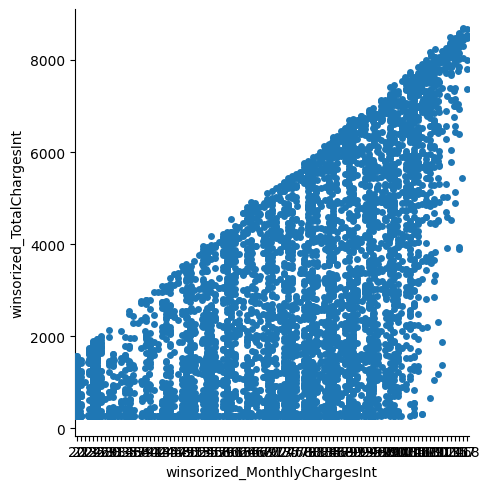

In [620]:
#Data visualizations
sns.catplot(x = 'winsorized_MonthlyChargesInt', y = 'winsorized_TotalChargesInt', data = df_reordered)

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


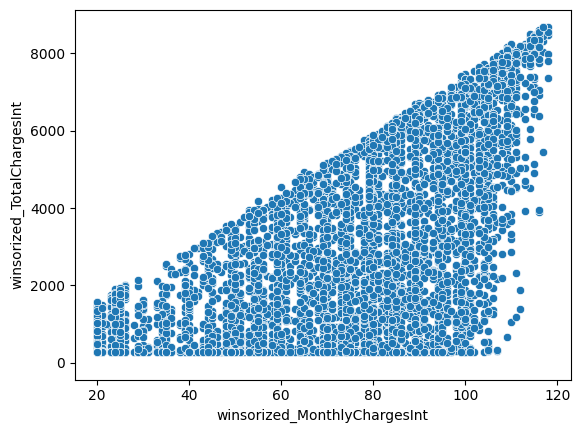

In [621]:
boundary = 100
sns.scatterplot(x = 'winsorized_MonthlyChargesInt', y = 'winsorized_TotalChargesInt', data = df_reordered)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 1)

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


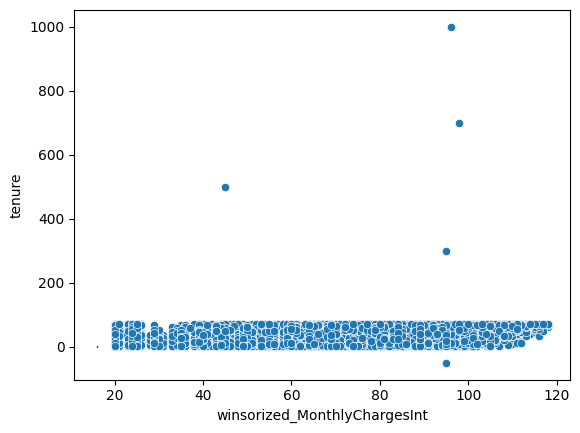

In [622]:
boundary = 16
sns.scatterplot(x = 'winsorized_MonthlyChargesInt', y = 'tenure', data = df2)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 1)

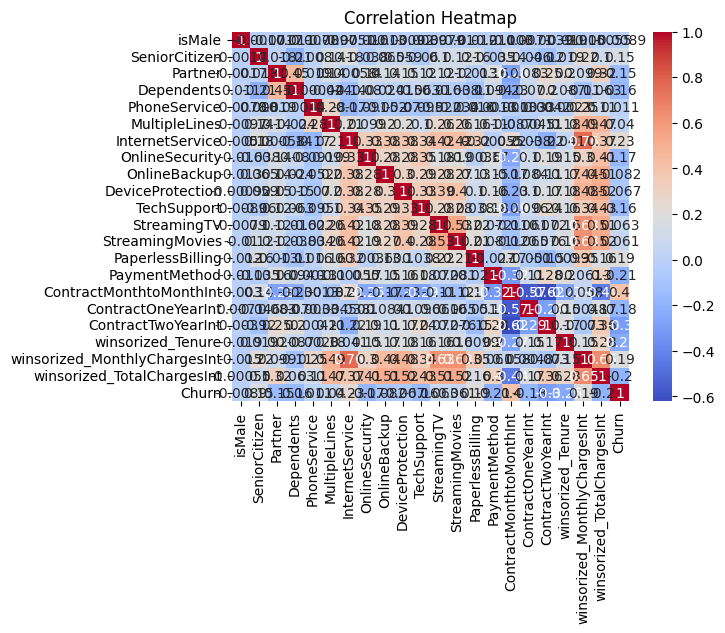

In [623]:
correlation_matrix = df_reordered.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [624]:
exclude = ['winsorized_Tenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn']  # If you don't need to exclude any rows
corrs = df_reordered.corr()['Churn'].drop(exclude, axis=0)
corrs_sorted = corrs.sort_values(axis=0)
corrs_sorted

ContractTwoYearInt        -0.301641
PaymentMethod             -0.210664
ContractOneYearInt        -0.178309
OnlineSecurity            -0.171777
TechSupport               -0.164998
Dependents                -0.163459
Partner                   -0.149866
OnlineBackup              -0.082358
DeviceProtection          -0.066568
isMale                    -0.008901
PhoneService               0.011486
MultipleLines              0.040071
StreamingMovies            0.060993
StreamingTV                0.063031
SeniorCitizen              0.150541
PaperlessBilling           0.191675
InternetService            0.227562
ContractMonthtoMonthInt    0.404098
Name: Churn, dtype: float64

In [625]:
for col in df_reordered.columns:
    print(f"Column '{col}' shape: {df_reordered[col].shape}")

Column 'isMale' shape: (7022,)
Column 'SeniorCitizen' shape: (7022,)
Column 'Partner' shape: (7022,)
Column 'Dependents' shape: (7022,)
Column 'PhoneService' shape: (7022,)
Column 'MultipleLines' shape: (7022,)
Column 'InternetService' shape: (7022,)
Column 'OnlineSecurity' shape: (7022,)
Column 'OnlineBackup' shape: (7022,)
Column 'DeviceProtection' shape: (7022,)
Column 'TechSupport' shape: (7022,)
Column 'StreamingTV' shape: (7022,)
Column 'StreamingMovies' shape: (7022,)
Column 'PaperlessBilling' shape: (7022,)
Column 'PaymentMethod' shape: (7022,)
Column 'ContractMonthtoMonthInt' shape: (7022,)
Column 'ContractOneYearInt' shape: (7022,)
Column 'ContractTwoYearInt' shape: (7022,)
Column 'winsorized_Tenure' shape: (7022,)
Column 'winsorized_MonthlyChargesInt' shape: (7022,)
Column 'winsorized_TotalChargesInt' shape: (7022,)
Column 'Churn' shape: (7022,)


In [626]:
df_reordered.shape

(7022, 22)

In [627]:
for col in df_reordered.columns:
    try:
        filtered_df = df_reordered[df_reordered[col] > 2]
        print(f"Indexing successful for column '{col}'")
    except Exception as e:
        print(f"Indexing error for column '{col}': {e}")

Indexing successful for column 'isMale'
Indexing successful for column 'SeniorCitizen'
Indexing successful for column 'Partner'
Indexing successful for column 'Dependents'
Indexing successful for column 'PhoneService'
Indexing successful for column 'MultipleLines'
Indexing successful for column 'InternetService'
Indexing successful for column 'OnlineSecurity'
Indexing successful for column 'OnlineBackup'
Indexing successful for column 'DeviceProtection'
Indexing successful for column 'TechSupport'
Indexing successful for column 'StreamingTV'
Indexing successful for column 'StreamingMovies'
Indexing successful for column 'PaperlessBilling'
Indexing successful for column 'PaymentMethod'
Indexing successful for column 'ContractMonthtoMonthInt'
Indexing successful for column 'ContractOneYearInt'
Indexing successful for column 'ContractTwoYearInt'
Indexing successful for column 'winsorized_Tenure'
Indexing successful for column 'winsorized_MonthlyChargesInt'
Indexing successful for column '

In [628]:
exclude = ['winsorized_Tenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn']  # If you don't need to exclude any rows
corrs = df_reordered.corr()['Churn'].drop(exclude, axis=0)
corrs_sorted = corrs.sort_values(axis=0)
corrs_sorted

ContractTwoYearInt        -0.301641
PaymentMethod             -0.210664
ContractOneYearInt        -0.178309
OnlineSecurity            -0.171777
TechSupport               -0.164998
Dependents                -0.163459
Partner                   -0.149866
OnlineBackup              -0.082358
DeviceProtection          -0.066568
isMale                    -0.008901
PhoneService               0.011486
MultipleLines              0.040071
StreamingMovies            0.060993
StreamingTV                0.063031
SeniorCitizen              0.150541
PaperlessBilling           0.191675
InternetService            0.227562
ContractMonthtoMonthInt    0.404098
Name: Churn, dtype: float64